In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r12-good.csv')
dfm = pd.read_csv('wat-r12-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,176,3,2,0xeae00,2,0,3,2,8,29,13,24,8,168,1,23,34,6,6,1
1,177,3,2,0xeae00,3,0,0,4,16,29,13,0,0,168,1,22,34,5,6,1
2,178,3,2,0xeae00,3,1,1,4,16,29,13,0,0,168,1,21,34,4,6,1
3,179,3,2,0xeae00,3,2,1,4,16,29,13,0,0,168,1,20,34,3,6,1
4,180,3,2,0xeae00,3,3,1,4,16,29,13,0,0,168,1,19,34,2,6,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,176,3,2,0xeae00,2,0,3,2,8,29,13,24,8,168,3,45,63,7,7,0
1,177,3,2,0xeae00,3,0,0,4,16,29,13,0,0,168,3,44,63,6,7,0
2,178,3,2,0xeae00,3,1,1,4,16,29,13,0,0,168,3,43,63,5,7,0
3,179,3,2,0xeae00,3,2,1,4,16,29,13,0,0,168,3,41,63,4,7,0
4,180,3,2,0xeae00,3,3,1,4,16,29,13,0,0,168,3,39,63,3,7,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,176,3,2,0xeae00,2,0,3,2,8,29,13,24,8,168,1,23,34,6,6,1
1,177,3,2,0xeae00,3,0,0,4,16,29,13,0,0,168,1,22,34,5,6,1
2,178,3,2,0xeae00,3,1,1,4,16,29,13,0,0,168,1,21,34,4,6,1
3,179,3,2,0xeae00,3,2,1,4,16,29,13,0,0,168,1,20,34,3,6,1
4,180,3,2,0xeae00,3,3,1,4,16,29,13,0,0,168,1,19,34,2,6,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,176,3,2,0xeae00,2,0,3,2,8,29,13,24,8,168,1,23,34,6,6,1
17479,176,3,2,0xeae00,2,0,3,2,8,29,13,24,8,168,3,45,63,7,7,0
17480,177,3,2,0xeae00,3,0,0,4,16,29,13,0,0,168,3,44,63,6,7,0
1,177,3,2,0xeae00,3,0,0,4,16,29,13,0,0,168,1,22,34,5,6,1
2,178,3,2,0xeae00,3,1,1,4,16,29,13,0,0,168,1,21,34,4,6,1
17481,178,3,2,0xeae00,3,1,1,4,16,29,13,0,0,168,3,43,63,5,7,0
17482,179,3,2,0xeae00,3,2,1,4,16,29,13,0,0,168,3,41,63,4,7,0
3,179,3,2,0xeae00,3,2,1,4,16,29,13,0,0,168,1,20,34,3,6,1
17483,180,3,2,0xeae00,3,3,1,4,16,29,13,0,0,168,3,39,63,3,7,0
4,180,3,2,0xeae00,3,3,1,4,16,29,13,0,0,168,1,19,34,2,6,1


In [13]:
df.to_csv('wat-r12-pkt.csv',index=False)

In [14]:
df = pd.read_csv("wat-r12-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,176,3,2,0xeae00,2,0,3,2,8,29,13,24,8,168,1,23,34,6,6,1
1,176,3,2,0xeae00,2,0,3,2,8,29,13,24,8,168,3,45,63,7,7,0
2,177,3,2,0xeae00,3,0,0,4,16,29,13,0,0,168,3,44,63,6,7,0
3,177,3,2,0xeae00,3,0,0,4,16,29,13,0,0,168,1,22,34,5,6,1
4,178,3,2,0xeae00,3,1,1,4,16,29,13,0,0,168,1,21,34,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33799,3251502,3,2,0x4d2c0,3,0,0,4,16,29,13,0,0,3251494,10027,24,27,1,1,1
33800,3251503,3,2,0x4d2c0,3,1,1,4,16,29,13,0,0,3251494,10027,23,27,1,1,1
33801,3251504,3,2,0x4d2c0,3,2,1,4,16,29,13,0,0,3251494,10027,22,27,1,1,1
33802,3251505,3,2,0x4d2c0,3,3,1,4,16,29,13,0,0,3251494,10027,21,27,1,1,1


In [15]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,-0.046823,-0.021881,0.042571,-0.003555,0.005839,-0.055825,-0.052676,-0.041396,-0.044474,0.053213,0.054271,1.000000,0.981584,-0.061005,-0.102087,-0.344048,-0.414439,0.051155
outport,-0.046823,1.000000,-0.218353,-0.017831,0.086173,-0.141370,0.704569,0.720802,0.877478,0.880821,-0.828920,-0.817617,-0.046818,-0.047799,0.020192,0.137729,-0.102165,-0.075290,0.005104
inport,-0.021881,-0.218353,1.000000,-0.354468,0.058669,-0.096249,0.272829,0.172216,-0.458863,-0.397117,-0.257212,-0.303747,-0.021882,-0.022318,-0.035430,-0.072811,-0.029295,-0.073436,0.001168
packet_type,0.042571,-0.017831,-0.354468,1.000000,-0.038222,0.062705,-0.449684,-0.440145,-0.005145,-0.021490,0.119152,0.143971,0.042572,0.043012,0.038068,0.003431,0.003408,0.000323,0.005074
flit_id,-0.003555,0.086173,0.058669,-0.038222,1.000000,0.163688,0.283172,0.287061,0.019001,0.019255,-0.116959,-0.105113,-0.003558,-0.003149,-0.143169,-0.007185,-0.054067,0.012586,0.002536
flit_type,0.005839,-0.141370,-0.096249,0.062705,0.163688,1.000000,-0.464555,-0.470936,-0.031173,-0.031588,0.191876,0.172442,0.005837,0.005166,-0.059702,0.034083,-0.021191,0.028344,-0.004160
vnet,-0.055825,0.704569,0.272829,-0.449684,0.283172,-0.464555,1.000000,0.987194,0.532349,0.558974,-0.842551,-0.835123,-0.055821,-0.056200,-0.028355,0.069505,-0.084756,-0.073328,0.005109
vc,-0.052676,0.720802,0.172216,-0.440145,0.287061,-0.470936,0.987194,1.000000,0.564671,0.584202,-0.814969,-0.801408,-0.052673,-0.052903,-0.026165,0.075910,-0.081182,-0.064442,0.004815
src_ni,-0.041396,0.877478,-0.458863,-0.005145,0.019001,-0.031173,0.532349,0.564671,1.000000,0.995705,-0.617797,-0.596324,-0.041391,-0.042374,0.034417,0.164567,-0.076995,-0.037250,0.002939
src_router,-0.044474,0.880821,-0.397117,-0.021490,0.019255,-0.031588,0.558974,0.584202,0.995705,1.000000,-0.652838,-0.633681,-0.044469,-0.045673,0.032355,0.169763,-0.078642,-0.040361,0.003348


In [16]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [17]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,3,2,2,0,3,2,8,24,8,168,1,6,6
1,3,2,2,0,3,2,8,24,8,168,3,7,7
2,3,2,3,0,0,4,16,0,0,168,3,6,7
3,3,2,3,0,0,4,16,0,0,168,1,5,6
4,3,2,3,1,1,4,16,0,0,168,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33799,3,2,3,0,0,4,16,0,0,3251494,10027,1,1
33800,3,2,3,1,1,4,16,0,0,3251494,10027,1,1
33801,3,2,3,2,1,4,16,0,0,3251494,10027,1,1
33802,3,2,3,3,1,4,16,0,0,3251494,10027,1,1


In [18]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.666667,0.333333,0.00,1.000000,0.0,0.0,0.8,0.571429,0.0,0.000000,0.277778,0.277778
1,1.0,0.666667,0.333333,0.00,1.000000,0.0,0.0,0.8,0.571429,0.0,0.000194,0.333333,0.333333
2,1.0,0.666667,0.500000,0.00,0.000000,1.0,1.0,0.0,0.000000,0.0,0.000194,0.277778,0.333333
3,1.0,0.666667,0.500000,0.00,0.000000,1.0,1.0,0.0,0.000000,0.0,0.000000,0.222222,0.277778
4,1.0,0.666667,0.500000,0.25,0.333333,1.0,1.0,0.0,0.000000,0.0,0.000000,0.166667,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33799,1.0,0.666667,0.500000,0.00,0.000000,1.0,1.0,0.0,0.000000,1.0,0.973682,0.000000,0.000000
33800,1.0,0.666667,0.500000,0.25,0.333333,1.0,1.0,0.0,0.000000,1.0,0.973682,0.000000,0.000000
33801,1.0,0.666667,0.500000,0.50,0.333333,1.0,1.0,0.0,0.000000,1.0,0.973682,0.000000,0.000000
33802,1.0,0.666667,0.500000,0.75,0.333333,1.0,1.0,0.0,0.000000,1.0,0.973682,0.000000,0.000000


In [19]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.218353,-0.017831,0.086173,-0.141370,0.704569,0.720802,-0.828920,-0.817617,-0.046818,-0.047799,-0.102165,-0.075290,0.005104
1,-0.218353,1.000000,-0.354468,0.058669,-0.096249,0.272829,0.172216,-0.257212,-0.303747,-0.021882,-0.022318,-0.029295,-0.073436,0.001168
2,-0.017831,-0.354468,1.000000,-0.038222,0.062705,-0.449684,-0.440145,0.119152,0.143971,0.042572,0.043012,0.003408,0.000323,0.005074
3,0.086173,0.058669,-0.038222,1.000000,0.163688,0.283172,0.287061,-0.116959,-0.105113,-0.003558,-0.003149,-0.054067,0.012586,0.002536
4,-0.141370,-0.096249,0.062705,0.163688,1.000000,-0.464555,-0.470936,0.191876,0.172442,0.005837,0.005166,-0.021191,0.028344,-0.004160
5,0.704569,0.272829,-0.449684,0.283172,-0.464555,1.000000,0.987194,-0.842551,-0.835123,-0.055821,-0.056200,-0.084756,-0.073328,0.005109
6,0.720802,0.172216,-0.440145,0.287061,-0.470936,0.987194,1.000000,-0.814969,-0.801408,-0.052673,-0.052903,-0.081182,-0.064442,0.004815
7,-0.828920,-0.257212,0.119152,-0.116959,0.191876,-0.842551,-0.814969,1.000000,0.996562,0.053209,0.054024,0.111245,0.098688,-0.006799
8,-0.817617,-0.303747,0.143971,-0.105113,0.172442,-0.835123,-0.801408,0.996562,1.000000,0.054267,0.055171,0.112792,0.102447,-0.006373
9,-0.046818,-0.021882,0.042572,-0.003558,0.005837,-0.055821,-0.052673,0.053209,0.054267,1.000000,0.981584,-0.344049,-0.414440,0.051155


In [20]:
train_Y = df['target']

In [21]:
train_Y

0        1
1        0
2        0
3        1
4        1
        ..
33799    1
33800    1
33801    1
33802    1
33803    1
Name: target, Length: 33804, dtype: int64

In [22]:
pca = PCA(0.95)

In [23]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
principal_components = pca.transform(train_X)
principal_components

array([[ 1.15274541,  0.86225168, -0.23732752,  0.45409398, -0.11807261],
       [ 1.15364496,  0.87049517, -0.23679145,  0.45282083, -0.1163327 ],
       [-0.55587394,  0.79062544, -0.51864379, -0.2886885 ,  0.05905894],
       ...,
       [-0.51596909, -0.64549292,  0.00470674, -0.03880186, -0.00998952],
       [-0.54201215, -0.65220261,  0.23764679, -0.03548301,  0.0152628 ],
       [-0.52446015, -0.65247896,  0.55626341,  0.19174313, -0.05061961]])

In [25]:
pca.explained_variance_ratio_

array([0.55129307, 0.14355845, 0.1092939 , 0.08751512, 0.0603496 ])

In [26]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

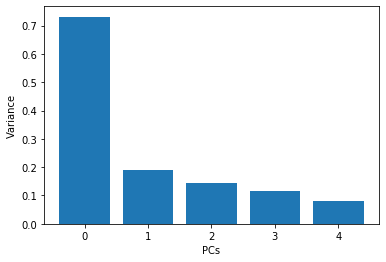

In [27]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [28]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4
0,1.152745,0.862252,-0.237328,0.454094,-0.118073
1,1.153645,0.870495,-0.236791,0.452821,-0.116333
2,-0.555874,0.790625,-0.518644,-0.288689,0.059059
3,-0.556773,0.782382,-0.519180,-0.287415,0.057319
4,-0.539597,0.779291,-0.200389,-0.059445,-0.008952
...,...,...,...,...,...
33799,-0.507478,-0.638507,-0.546850,-0.269347,0.030641
33800,-0.489926,-0.638783,-0.228233,-0.042121,-0.035242
33801,-0.515969,-0.645493,0.004707,-0.038802,-0.009990
33802,-0.542012,-0.652203,0.237647,-0.035483,0.015263


In [29]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,target
0,1.152745,0.862252,-0.237328,0.454094,-0.118073,1
1,1.153645,0.870495,-0.236791,0.452821,-0.116333,0
2,-0.555874,0.790625,-0.518644,-0.288689,0.059059,0
3,-0.556773,0.782382,-0.519180,-0.287415,0.057319,1
4,-0.539597,0.779291,-0.200389,-0.059445,-0.008952,1
...,...,...,...,...,...,...
33799,-0.507478,-0.638507,-0.546850,-0.269347,0.030641,1
33800,-0.489926,-0.638783,-0.228233,-0.042121,-0.035242,1
33801,-0.515969,-0.645493,0.004707,-0.038802,-0.009990,1
33802,-0.542012,-0.652203,0.237647,-0.035483,0.015263,1


In [30]:
final_df.corr()

,0,1,2,3,4,target
0,1.000000e+00,-5.539467e-15,-2.723654e-15,7.783752e-15,-7.611277e-15,-0.006042
1,-5.539467e-15,1.000000e+00,-7.512443e-16,3.201005e-16,9.174193e-17,-0.004416
2,-2.723654e-15,-7.512443e-16,1.000000e+00,3.569706e-15,-1.903823e-16,-0.000217
3,7.783752e-15,3.201005e-16,3.569706e-15,1.000000e+00,-1.260801e-15,0.001328
4,-7.611277e-15,9.174193e-17,-1.903823e-16,-1.260801e-15,1.000000e+00,0.000554
target,-6.042457e-03,-4.415505e-03,-2.172044e-04,1.327821e-03,5.537571e-04,1.000000


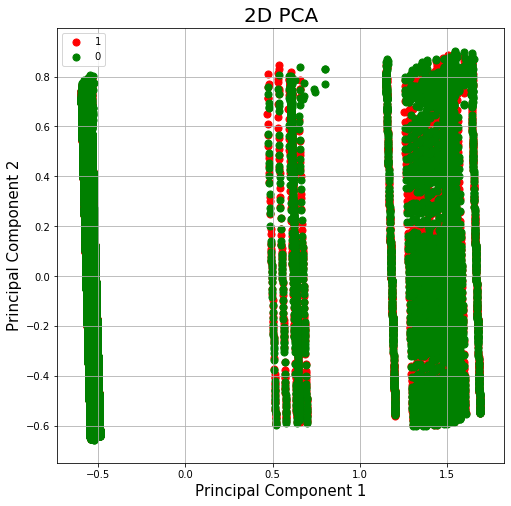

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [32]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,3,2,2,0,3,2,8,29,13,24,8,168,1,23,34,6,6,1
1,3,2,2,0,3,2,8,29,13,24,8,168,3,45,63,7,7,0
2,3,2,3,0,0,4,16,29,13,0,0,168,3,44,63,6,7,0
3,3,2,3,0,0,4,16,29,13,0,0,168,1,22,34,5,6,1
4,3,2,3,1,1,4,16,29,13,0,0,168,1,21,34,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33799,3,2,3,0,0,4,16,29,13,0,0,3251494,10027,24,27,1,1,1
33800,3,2,3,1,1,4,16,29,13,0,0,3251494,10027,23,27,1,1,1
33801,3,2,3,2,1,4,16,29,13,0,0,3251494,10027,22,27,1,1,1
33802,3,2,3,3,1,4,16,29,13,0,0,3251494,10027,21,27,1,1,1


In [33]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [34]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [35]:
seed = 7
np.random.seed(seed)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [37]:
model = Sequential()

In [38]:
n_cols = train_X.shape[1]
n_cols

13

In [39]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [41]:
model.fit(x_train, y_train, epochs=100, validation_split=0.4)

Train on 13791 samples, validate on 9195 samples
Epoch 1/100
13791/13791 [==============================] - 2s 138us/step - loss: 0.2499 - accuracy: 0.5033 - val_loss: 0.2496 - val_accuracy: 0.5228
Epoch 2/100
13791/13791 [==============================] - 1s 103us/step - loss: 0.2497 - accuracy: 0.5139 - val_loss: 0.2494 - val_accuracy: 0.5283
Epoch 3/100
13791/13791 [==============================] - 2s 127us/step - loss: 0.2496 - accuracy: 0.5174 - val_loss: 0.2493 - val_accuracy: 0.5268
Epoch 4/100
13791/13791 [==============================] - 1s 105us/step - loss: 0.2495 - accuracy: 0.5191 - val_loss: 0.2493 - val_accuracy: 0.5266
Epoch 5/100
13791/13791 [==============================] - 1s 92us/step - loss: 0.2495 - accuracy: 0.5201 - val_loss: 0.2492 - val_accuracy: 0.5339
Epoch 6/100
13791/13791 [==============================] - 1s 93us/step - loss: 0.2493 - accuracy: 0.5267 - val_loss: 0.2491 - val_accuracy: 0.5370
Epoch 7/100
13791/13791 [==============================] - 

In [42]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [43]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.09%


In [44]:
dff = pd.read_csv('wat-r12-pkt.csv',nrows=500)

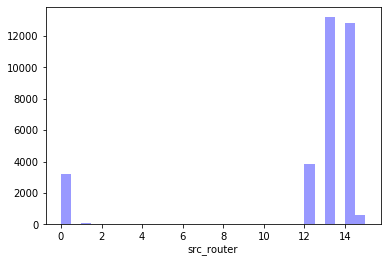

In [45]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

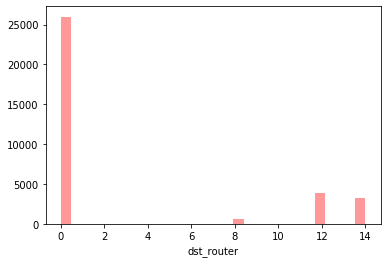

In [46]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

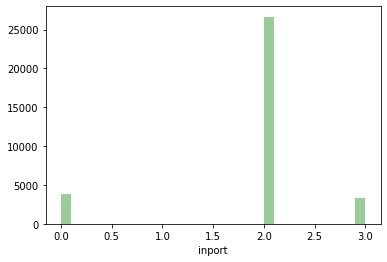

In [47]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

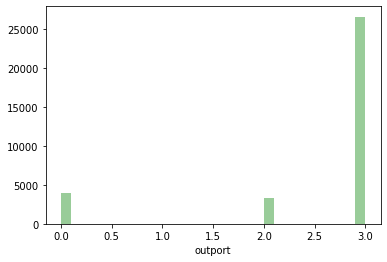

In [48]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

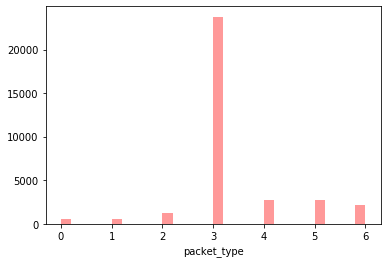

In [49]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')